<a href="https://colab.research.google.com/github/cslearning20xx/exploration/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Example 1: Random generated dataset with two classes**


Load required libraries

In [0]:
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs 
from mlxtend.plotting import plot_decision_regions

Create on the fly dataset for running SVM

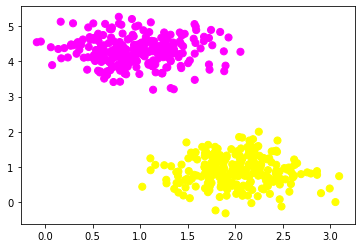

In [0]:
X, Y = make_blobs(n_samples=500, centers=2, 
                  random_state=0, cluster_std=0.40) 
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring'); 
plt.show() 

Fit SVM classifier with linear Kernel

In [0]:
from sklearn.svm import SVC # "Support Vector Classifier" 
clf = SVC(kernel='linear',) 
  
# fitting x samples and y classes 
clf.fit(X, Y) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Plot the SVM decision boundary

Text(0.5, 1.0, 'SVM Decision Region Boundary')

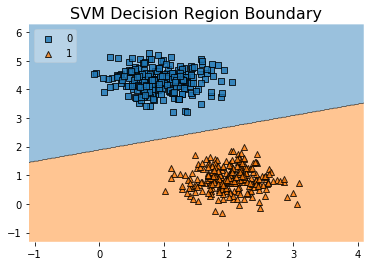

In [0]:
plot_decision_regions(X, Y,
                      clf=clf, 
                      legend=2)
plt.title('SVM Decision Region Boundary', size=16)

**Example 2**

Import required libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Uploaded dataset from local drive to Google Colab

In [0]:
# https://drive.google.com/file/d/13nw-uRXPY8XIZQxKRNZ3yYlho-CYm_Qt/view
from google.colab import files
import io

In [0]:
uploaded = files.upload()

Saving bill_authentication.csv to bill_authentication.csv


Load your dataset now as a dataframe

In [0]:
df = pd.read_csv(io.StringIO(uploaded['bill_authentication.csv'].decode('utf-8')))

In [0]:
df.head()
df.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


EDA

In [0]:
import seaborn as sns


In [0]:
sns.catplot( 'Class', 'Variance', data = df)
sns.catplot( 'Class', 'Skewness', data = df)
sns.catplot( 'Class', 'Curtosis', data = df)
sns.catplot( 'Class', 'Entropy', data = df)

Dividing data into attributes and labels

In [0]:
X = df.drop('Class', axis=1)
y = df['Class']

Split the data into train and test

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [0]:
from sklearn.svm import SVC
clf = SVC(kernel = 'linear')
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_pred = clf.predict(X_test)

Evaluating the algorithm

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[164   1]
 [  3 107]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       165
           1       0.99      0.97      0.98       110

    accuracy                           0.99       275
   macro avg       0.99      0.98      0.98       275
weighted avg       0.99      0.99      0.99       275



**Example 3 : IRIS Dataset**

In [0]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
irisdata = pd.read_csv(url, names=colnames)

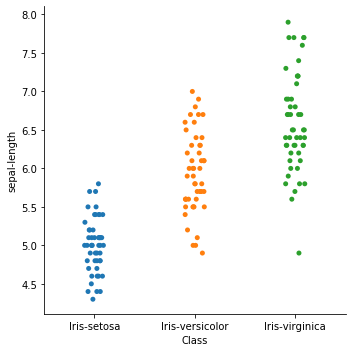

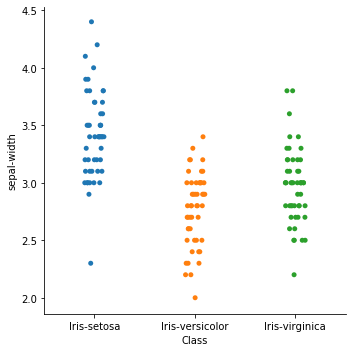

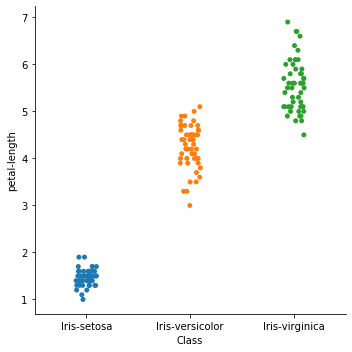

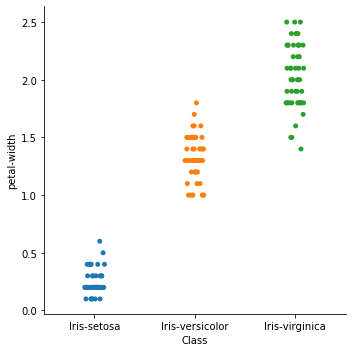

In [0]:
irisdata.head()
irisdata.describe()
sns.catplot( 'Class', 'sepal-length', data = irisdata)
sns.catplot( 'Class', 'sepal-width', data = irisdata)
sns.catplot( 'Class', 'petal-length', data = irisdata)
sns.catplot( 'Class', 'petal-width', data = irisdata)

In [0]:
X = irisdata.drop('Class', axis=1)
y = irisdata['Class']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

from sklearn.svm import SVC
clf = SVC(kernel = 'linear')
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[10  0  0]
 [ 0 11  0]
 [ 0  1  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.89      0.94         9

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [0]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
def RunSVM(df, kernel):
  X = df.drop('Class', axis=1)
  y = df['Class']
  
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

  clf = SVC(kernel = kernel )
  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)
 
  print(confusion_matrix(y_test,y_pred))
  print(classification_report(y_test,y_pred))


In [0]:
RunSVM(irisdata, 'linear')
RunSVM(irisdata, 'rbf')

[[10  0  0]
 [ 0  7  0]
 [ 0  0 13]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         7
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[12  0  0]
 [ 0  9  0]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

